In [1]:
import yfinance as yf
import pandas as pd
import xlwings as xw
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data 

import yfinance as yfin
import statistics
import seaborn as sns


In [15]:
assets = ['^MXX','WALMEX.MX','FEMSAUBD.MX','ALFAA.MX','CEMEXCPO.MX','BIMBOA.MX','GFNORTEO.MX','SORIANAB.MX','ALPEKA.MX','GCARSOA1.MX','LIVEPOL1.MX','ELEKTRA.MX','PE&OLES.MX','GFINBURO.MX','GRUMAB.MX','BACHOCOB.MX','ICA.MX','CULTIBAB.MX','GNP.MX','FRAGUAB.MX','KIMBERA.MX','SIMECB.MX','ALSEA.MX','GPH1.MX','VITROA.MX','GENTERA.MX','HERDEZ.MX','VOLARA.MX','AZTEF','LABB.MX','MEGACPO.MX','BEVIDESA.MX','AXTELCPO.MX','GCC.MX','GISSAA.MX','CMOCTEZ.MX','BAFARB.MX','GPROFUT.MX','LAMOSA.MX','CABLECPO.MX','CERAMICB.MX','PINFRA.MX','AGUA.MX','CIEB.MX','ARA.MX','POCHTECB.MX','ASURB.MX','FINDEP.MX','POSADASA.MX','MINSAB.MX','GAPB.MX','INVEXA.MX','MONEXB.MX','COLLADO.MX','AUTLANB.MX','PASAB.MX']
yfin.pdr_override()

stocks = data.get_data_yahoo(assets, start='2019-01-14', end='2023-10-14')


[*********************100%%**********************]  56 of 56 completed


In [16]:
df2=pd.read_excel("SECTORES.xlsx") #leemos nuestra base de datos
df2['SCTR']=df2['SCTR'].astype(int)



In [22]:
stocks.head(8)
stocks1=stocks['Adj Close']

In [23]:
stocks1.head
retornos = np.log(stocks1).diff()
retornos = retornos.dropna()
retornos

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ARA.MX,ASURB.MX,AUTLANB.MX,AXTELCPO.MX,AZTEF,BACHOCOB.MX,...,PE&OLES.MX,PINFRA.MX,POCHTECB.MX,POSADASA.MX,SIMECB.MX,SORIANAB.MX,VITROA.MX,VOLARA.MX,WALMEX.MX,^MXX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,0.016345,0.020869,0.012497,-0.011780,0.004598,0.005289,0.000000,0.079022,0.0,0.014054,...,0.042392,0.023221,0.000000,0.000000,0.005634,-0.017752,0.000000,0.007682,0.006206,0.016619
2022-01-13,-0.018220,-0.012065,0.003673,0.000232,0.015927,0.006123,0.029559,0.036105,0.0,0.004274,...,0.001659,-0.016242,0.000000,-0.004955,0.033207,0.024016,-0.006501,0.011414,-0.012173,-0.000384
2022-01-14,0.009337,-0.002025,0.003660,-0.007227,-0.006795,0.019840,0.000746,-0.026349,0.0,-0.003722,...,-0.037447,-0.010231,0.000000,0.003306,-0.022033,-0.001667,-0.004357,0.001512,-0.005443,-0.003446
2022-01-19,0.023189,0.023209,0.085963,-0.033559,-0.018141,-0.042153,0.009720,0.000000,0.0,-0.003818,...,0.015172,-0.008098,-0.028988,-0.021564,-0.019694,-0.008361,0.000000,-0.035519,0.002956,-0.007712
2022-01-20,0.004645,0.004041,-0.008271,0.001431,-0.025494,0.000809,-0.001489,0.019657,0.0,-0.001504,...,0.000293,-0.004337,0.028988,0.000000,0.019638,-0.030693,-0.004396,-0.022689,-0.010454,-0.005979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,-0.013281,-0.009687,-0.023417,-0.009433,-0.005814,-0.020800,0.012677,-0.002674,0.0,-0.051293,...,-0.006556,0.009461,0.000000,0.000000,-0.014194,0.000000,0.009950,-0.053888,-0.051128,-0.007464
2023-10-10,0.052472,-0.015159,-0.005591,0.024804,0.008708,0.061220,0.013475,-0.004024,0.0,-0.041645,...,0.015934,0.023970,-0.032833,0.000000,0.000000,-0.010967,-0.009950,0.042524,0.031501,0.019937
2023-10-11,0.051983,-0.019048,-0.021247,-0.016938,0.000000,-0.007268,-0.019306,0.047253,0.0,0.001371,...,0.006104,-0.008012,0.013263,0.000000,-0.000146,0.028200,0.000000,0.001631,-0.012870,0.001091


In [26]:
acumulado = (1+retornos).cumprod()
#acumulado.fillna(0, inplace = True)
acumulado

,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ARA.MX,ASURB.MX,AUTLANB.MX,AXTELCPO.MX,AZTEF,BACHOCOB.MX,...,PE&OLES.MX,PINFRA.MX,POCHTECB.MX,POSADASA.MX,SIMECB.MX,SORIANAB.MX,VITROA.MX,VOLARA.MX,WALMEX.MX,^MXX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-12,1.016345,1.020869,1.012497,0.988220,1.004598,1.005289,1.000000,1.079022,1.000000,1.014054,...,1.042392,1.023221,1.000000,1.000000,1.005634,0.982248,1.000000,1.007682,1.006206,1.016619
2022-01-13,0.997828,1.008553,1.016216,0.988450,1.020598,1.011444,1.029559,1.117980,1.000000,1.018389,...,1.044121,1.006602,1.000000,0.995045,1.039027,1.005838,0.993499,1.019184,0.993957,1.016229
2022-01-14,1.007145,1.006511,1.019935,0.981306,1.013663,1.031511,1.030327,1.088523,1.000000,1.014599,...,1.005022,0.996303,1.000000,0.998335,1.016134,1.004162,0.989170,1.020725,0.988548,1.012727
2022-01-19,1.030500,1.029871,1.107612,0.948374,0.995275,0.988030,1.040342,1.088523,1.000000,1.010725,...,1.020270,0.988235,0.971012,0.976807,0.996123,0.995766,0.989170,0.984470,0.991469,1.004917
2022-01-20,1.035287,1.034032,1.098451,0.949731,0.969901,0.988829,1.038793,1.109919,1.000000,1.009205,...,1.020569,0.983948,0.999160,0.976807,1.015685,0.965203,0.984823,0.962134,0.981105,0.998909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,0.892295,0.616132,0.656382,1.405586,0.743013,0.951479,0.819985,0.203317,151.106061,0.858974,...,0.625274,1.061030,1.156513,0.786924,1.104012,1.070949,0.919590,0.322454,0.806711,0.955148
2023-10-10,0.939115,0.606792,0.652713,1.440451,0.749483,1.009729,0.831034,0.202499,151.106061,0.823202,...,0.635237,1.086462,1.118541,0.786924,1.104012,1.059205,0.910440,0.336167,0.832124,0.974191
2023-10-11,0.987934,0.595234,0.638844,1.416053,0.749483,1.002390,0.814991,0.212068,151.106061,0.824331,...,0.639114,1.077758,1.133376,0.786924,1.103850,1.089074,0.910440,0.336715,0.821414,0.975254


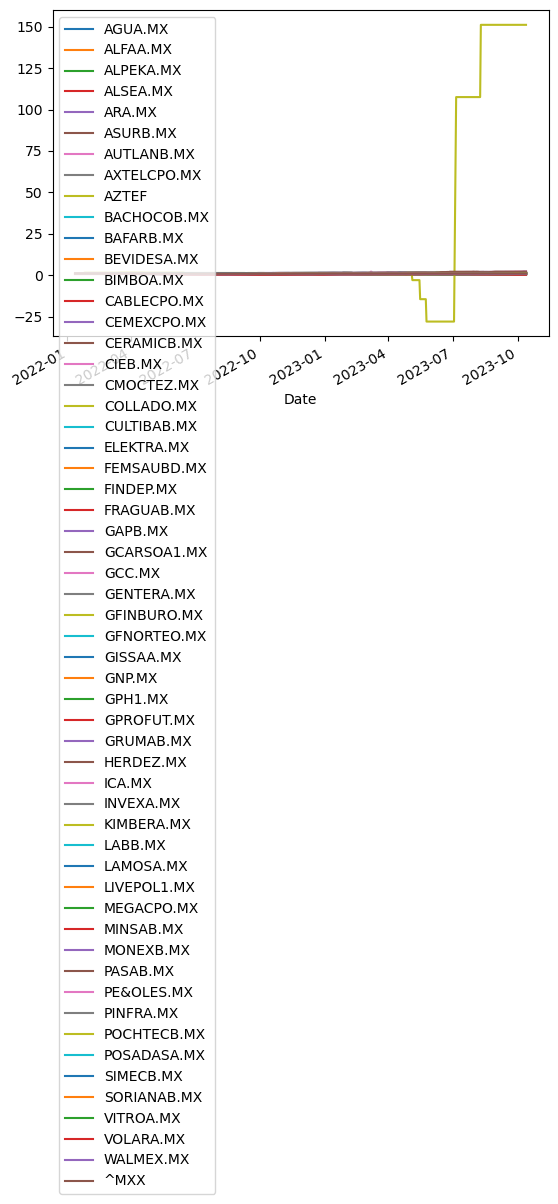

In [27]:
acumulado.plot()
plt.show()

In [74]:
Anualizado = acumulado[1:]**(252/len(acumulado))-1

In [75]:
REND=Anualizado.mean()


In [76]:
VOL=Anualizado.std()


In [77]:
REND_VOL=REND/VOL
REND_VOL

AGUA.MX       -0.222245
ALFAA.MX      -2.260750
ALPEKA.MX     -1.657171
ALSEA.MX      -1.431668
ARA.MX        -1.146683
ASURB.MX      -0.570228
AUTLANB.MX    -0.754928
AXTELCPO.MX   -0.524309
AZTEF         -2.081991
BACHOCOB.MX   -0.148736
BAFARB.MX      0.766261
BEVIDESA.MX         NaN
BIMBOA.MX      0.607196
CABLECPO.MX   -0.847054
CEMEXCPO.MX   -0.696250
CERAMICB.MX    0.205724
CIEB.MX       -1.821379
CMOCTEZ.MX     0.129533
COLLADO.MX    -0.856445
CULTIBAB.MX   -0.618481
ELEKTRA.MX     0.785417
FEMSAUBD.MX   -0.714955
FINDEP.MX      1.057989
FRAGUAB.MX    -0.152763
GAPB.MX        0.536323
GCARSOA1.MX   -1.607546
GCC.MX         0.213033
GENTERA.MX    -0.618344
GFINBURO.MX   -1.554862
GFNORTEO.MX    0.507462
GISSAA.MX      0.192540
GNP.MX         1.787219
GPH1.MX        0.308683
GPROFUT.MX     0.293548
GRUMAB.MX      0.181771
HERDEZ.MX     -0.449139
ICA.MX        -0.490600
IENOVA.MX     -1.606186
INVEXA.MX      0.725126
KIMBERA.MX     0.596110
LABB.MX        2.742663
LAMOSA.MX      0

In [78]:
beta=Anualizado.cov().div(Anualizado.var())

In [79]:
beta.mean()

AGUA.MX        0.127051
ALFAA.MX       0.043152
ALPEKA.MX      0.157748
ALSEA.MX       0.351356
ARA.MX         0.290572
ASURB.MX       0.374897
AUTLANB.MX     0.178067
AXTELCPO.MX   -0.061221
AZTEF          0.010774
BACHOCOB.MX    0.279948
BAFARB.MX      0.110116
BEVIDESA.MX         NaN
BIMBOA.MX      0.153933
CABLECPO.MX    0.873345
CEMEXCPO.MX    0.165379
CERAMICB.MX    0.218005
CIEB.MX        0.194724
CMOCTEZ.MX     0.355607
COLLADO.MX    -0.315644
CULTIBAB.MX    0.082532
ELEKTRA.MX    -0.092303
FEMSAUBD.MX    0.455385
FINDEP.MX     -0.116340
FRAGUAB.MX     0.244859
GAPB.MX        0.276062
GCARSOA1.MX    0.267348
GCC.MX         0.334622
GENTERA.MX     0.167252
GFINBURO.MX    0.252870
GFNORTEO.MX    0.261811
GISSAA.MX      0.162760
GNP.MX         0.012461
GPH1.MX       -0.226358
GPROFUT.MX     0.206815
GRUMAB.MX      0.106549
HERDEZ.MX      0.333957
ICA.MX        -9.195696
IENOVA.MX      0.344587
INVEXA.MX      0.233462
KIMBERA.MX     0.027545
LABB.MX       -0.271793
LAMOSA.MX      0

In [80]:
cov = retornos.cov()*252
cov_with_market = cov.iloc[0,1]
market_var = retornos.var()*252
stock_beta = cov_with_market / market_var

In [81]:
tasalibredriesgo = 0.0095
riskpremium = (retornos['^MXX'].mean()*252) - tasalibredriesgo

In [82]:
stock_capm_return = tasalibredriesgo + stock_beta * riskpremium


In [83]:
sharpe_stock = (stock_capm_return - tasalibredriesgo) /(Anualizado.std()*252**0.5)

In [84]:
BETAS=(round(stock_beta,3))


In [85]:
CAPM=round(stock_capm_return*100,3)
CAPM


AGUA.MX           1.342
ALFAA.MX          1.415
ALPEKA.MX         1.689
ALSEA.MX          1.473
ARA.MX            1.524
ASURB.MX          1.673
AUTLANB.MX        2.069
AXTELCPO.MX       1.293
AZTEF             0.954
BACHOCOB.MX       2.250
BAFARB.MX         2.862
BEVIDESA.MX         inf
BIMBOA.MX         1.624
CABLECPO.MX      12.296
CEMEXCPO.MX       1.379
CERAMICB.MX       5.509
CIEB.MX           1.320
CMOCTEZ.MX        4.430
COLLADO.MX        8.550
CULTIBAB.MX       1.519
ELEKTRA.MX        3.282
FEMSAUBD.MX       2.290
FINDEP.MX         2.887
FRAGUAB.MX        2.235
GAPB.MX           1.490
GCARSOA1.MX       1.466
GCC.MX            1.948
GENTERA.MX        1.330
GFINBURO.MX       1.535
GFNORTEO.MX       1.511
GISSAA.MX         1.784
GNP.MX            2.861
GPH1.MX           8.333
GPROFUT.MX        2.292
GRUMAB.MX         2.007
HERDEZ.MX         1.515
ICA.MX         2976.397
IENOVA.MX         2.222
INVEXA.MX        17.200
KIMBERA.MX        1.834
LABB.MX           1.593
LAMOSA.MX       

In [86]:
SHARP=round(sharpe_stock,3)
SHARP

AGUA.MX           0.006
ALFAA.MX          0.005
ALPEKA.MX         0.010
ALSEA.MX          0.007
ARA.MX            0.008
ASURB.MX          0.012
AUTLANB.MX        0.017
AXTELCPO.MX       0.002
AZTEF             0.000
BACHOCOB.MX       0.045
BAFARB.MX         0.015
BEVIDESA.MX         inf
BIMBOA.MX         0.007
CABLECPO.MX       0.537
CEMEXCPO.MX       0.005
CERAMICB.MX       0.051
CIEB.MX           0.003
CMOCTEZ.MX        0.097
COLLADO.MX        0.373
CULTIBAB.MX       0.011
ELEKTRA.MX        0.037
FEMSAUBD.MX       0.028
FINDEP.MX         0.024
FRAGUAB.MX        0.016
GAPB.MX           0.007
GCARSOA1.MX       0.007
GCC.MX            0.017
GENTERA.MX        0.003
GFINBURO.MX       0.007
GFNORTEO.MX       0.007
GISSAA.MX         0.009
GNP.MX            0.009
GPH1.MX           0.287
GPROFUT.MX        0.014
GRUMAB.MX         0.026
HERDEZ.MX         0.010
ICA.MX         1956.150
IENOVA.MX         0.033
INVEXA.MX         1.126
KIMBERA.MX        0.016
LABB.MX           0.013
LAMOSA.MX       

In [87]:
datos=[REND,VOL,REND_VOL,BETAS,CAPM,SHARP]
col=['REND','VOL','REND_VOL','BETAS','CAPM','SHARP']

In [88]:
DF = pd.DataFrame(datos,index=col)
DF

,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,ARA.MX,ASURB.MX,AUTLANB.MX,AXTELCPO.MX,AZTEF,BACHOCOB.MX,...,PE&OLES.MX,PINFRA.MX,POCHTECB.MX,POSADASA.MX,SIMECB.MX,SORIANAB.MX,VITROA.MX,VOLARA.MX,WALMEX.MX,^MXX
REND,-0.009523,-0.143080,-0.080767,-0.063082,-0.050300,-0.022217,-0.031220,-0.070288,-0.664978,-0.002714,...,-0.038251,-0.028826,0.012737,-0.079618,0.201281,-0.061135,-0.132702,0.117563,0.028627,0.004014
VOL,0.042849,0.063289,0.048738,0.044062,0.043865,0.038962,0.041355,0.134059,0.319395,0.018244,...,0.052508,0.032387,0.025512,0.048495,0.166108,0.038693,0.069667,0.086051,0.014757,0.023616
REND_VOL,-0.222245,-2.260750,-1.657171,-1.431668,-1.146683,-0.570228,-0.754928,-0.524309,-2.081991,-0.148736,...,-0.728475,-0.890035,0.499265,-1.641789,1.211749,-1.580001,-1.904807,1.366200,1.939875,0.169953
BETAS,0.137000,0.163000,0.259000,0.183000,0.201000,0.253000,0.392000,0.120000,0.001000,0.455000,...,0.125000,0.378000,0.255000,0.831000,0.306000,0.279000,0.407000,0.105000,0.397000,0.882000
CAPM,1.342000,1.415000,1.689000,1.473000,1.524000,1.673000,2.069000,1.293000,0.954000,2.250000,...,1.308000,2.029000,1.677000,3.321000,1.825000,1.746000,2.112000,1.250000,2.083000,3.468000
SHARP,0.006000,0.005000,0.010000,0.007000,0.008000,0.012000,0.017000,0.002000,0.000000,0.045000,...,0.004000,0.021000,0.018000,0.031000,0.003000,0.013000,0.011000,0.002000,0.048000,0.067000


In [89]:
DF1 = DF.T
DF1
DF1.index.name = 'ACTIVOS'
DF1

DF1=DF1.merge(df2, left_on=['ACTIVOS'], right_on=['ACTIVO'])
DF1=DF1.drop(columns=['SECTOR'])
DF1 = DF1.set_index('ACTIVO')
Filt=(DF1['REND']>0)
DF1=DF1.loc[Filt,['REND','VOL','REND_VOL','BETAS','CAPM','SHARP','SCTR']]
DF1

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
BAFARB.MX,0.062844,0.082014,0.766261,0.670,2.862,0.015,1
BIMBOA.MX,0.037102,0.061105,0.607196,0.236,1.624,0.007,1
CERAMICB.MX,0.011512,0.055960,0.205724,1.597,5.509,0.051,2
CMOCTEZ.MX,0.002925,0.022578,0.129533,1.219,4.430,0.097,2
ELEKTRA.MX,0.031384,0.039958,0.785417,0.817,3.282,0.037,4
FINDEP.MX,0.053900,0.050946,1.057989,0.679,2.887,0.024,3
GAPB.MX,0.026977,0.050301,0.536323,0.189,1.490,0.007,8
GCC.MX,0.007990,0.037507,0.213033,0.349,1.948,0.017,2
GFNORTEO.MX,0.027179,0.053560,0.507462,0.197,1.511,0.007,3


In [90]:
DF1.dtypes

REND        float64
VOL         float64
REND_VOL    float64
BETAS       float64
CAPM        float64
SHARP       float64
SCTR          int32
dtype: object

In [91]:
newdf2=pd.get_dummies(data=DF1, drop_first=True)
newdf2

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
BAFARB.MX,0.062844,0.082014,0.766261,0.670,2.862,0.015,1
BIMBOA.MX,0.037102,0.061105,0.607196,0.236,1.624,0.007,1
CERAMICB.MX,0.011512,0.055960,0.205724,1.597,5.509,0.051,2
CMOCTEZ.MX,0.002925,0.022578,0.129533,1.219,4.430,0.097,2
ELEKTRA.MX,0.031384,0.039958,0.785417,0.817,3.282,0.037,4
FINDEP.MX,0.053900,0.050946,1.057989,0.679,2.887,0.024,3
GAPB.MX,0.026977,0.050301,0.536323,0.189,1.490,0.007,8
GCC.MX,0.007990,0.037507,0.213033,0.349,1.948,0.017,2
GFNORTEO.MX,0.027179,0.053560,0.507462,0.197,1.511,0.007,3


In [92]:
newdf3 = newdf2.drop(columns=['VOL','REND_VOL','CAPM','SHARP'])

In [93]:
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [94]:
explicativas=DF1[['VOL','CAPM','SCTR']]

Objetivo=DF1[['REND']]
Objetivo

,REND
ACTIVO,
BAFARB.MX,0.062844
BIMBOA.MX,0.037102
CERAMICB.MX,0.011512
CMOCTEZ.MX,0.002925
ELEKTRA.MX,0.031384
FINDEP.MX,0.053900
GAPB.MX,0.026977
GCC.MX,0.007990
GFNORTEO.MX,0.027179


In [95]:
#División de los datos en train y test
# ------------------------------------------------------------------------------

X = explicativas
y = Objetivo
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X,y)




DecisionTreeRegressor(random_state=0)

In [96]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)


In [97]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)
RMSE: 133.351


RMSE:  0.051


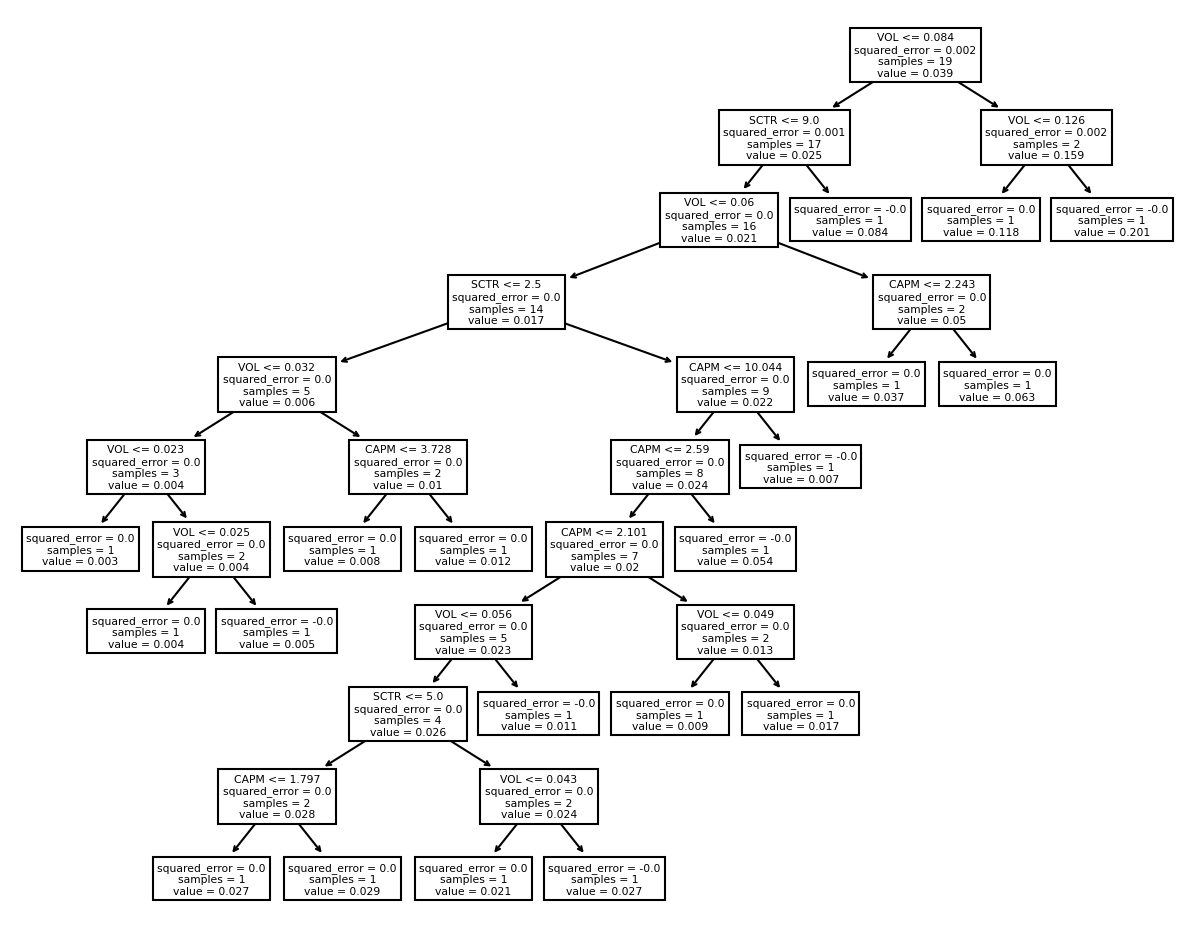

In [99]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [100]:
export_graphviz(model, out_file ='tree_structure.dot', 
               feature_names =['VOL','CAPM','SCTR'])

Profundidad del árbol: 10
Número de nodos terminales: 19


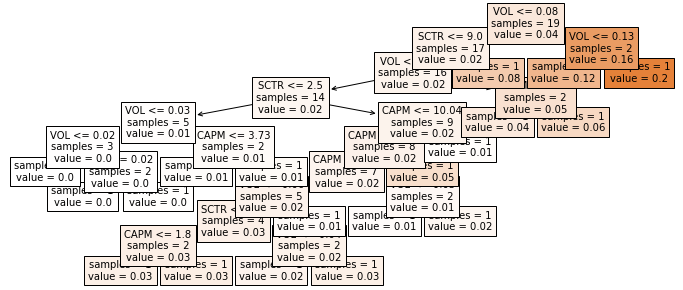

In [101]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = explicativas.columns,
            class_names   = 'BETAS',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [102]:
texto_model = export_text(
                    decision_tree = model,
                    feature_names = list(explicativas.columns)
               )
print(texto_model)

|--- VOL <= 0.08
|   |--- SCTR <= 9.00
|   |   |--- VOL <= 0.06
|   |   |   |--- SCTR <= 2.50
|   |   |   |   |--- VOL <= 0.03
|   |   |   |   |   |--- VOL <= 0.02
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- VOL >  0.02
|   |   |   |   |   |   |--- VOL <= 0.02
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- VOL >  0.02
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- VOL >  0.03
|   |   |   |   |   |--- CAPM <= 3.73
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |--- CAPM >  3.73
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |--- SCTR >  2.50
|   |   |   |   |--- CAPM <= 10.04
|   |   |   |   |   |--- CAPM <= 2.59
|   |   |   |   |   |   |--- CAPM <= 2.10
|   |   |   |   |   |   |   |--- VOL <= 0.06
|   |   |   |   |   |   |   |   |--- SCTR <= 5.00
|   |   |   |   |   |   |   |   |   |--- CAPM <= 1.80
|   |   |   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |   |   

In [103]:
importancia_predictores = pd.DataFrame(
                            {'predictor': explicativas.columns,
                             'importancia': model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,VOL,0.856128
2,SCTR,0.104634
1,CAPM,0.039238


In [143]:
Filt=(DF1['CAPM']<=10.04)&(DF1['VOL']<=.084)&(DF1['SCTR']<=9) #Aplicamos un filtro a la base para descubirir la relacion de personas con diabetes y anemia
DF1.loc[Filt]

,REND,VOL,REND_VOL,BETAS,CAPM,SHARP,SCTR
ACTIVO,,,,,,,
BAFARB.MX,0.062844,0.082014,0.766261,0.670,2.862,0.015,1
BIMBOA.MX,0.037102,0.061105,0.607196,0.236,1.624,0.007,1
CERAMICB.MX,0.011512,0.055960,0.205724,1.597,5.509,0.051,2
CMOCTEZ.MX,0.002925,0.022578,0.129533,1.219,4.430,0.097,2
ELEKTRA.MX,0.031384,0.039958,0.785417,0.817,3.282,0.037,4
FINDEP.MX,0.053900,0.050946,1.057989,0.679,2.887,0.024,3
GAPB.MX,0.026977,0.050301,0.536323,0.189,1.490,0.007,8
GCC.MX,0.007990,0.037507,0.213033,0.349,1.948,0.017,2
GFNORTEO.MX,0.027179,0.053560,0.507462,0.197,1.511,0.007,3


In [191]:
df_activos=retornos[['GAPB.MX','GFNORTEO.MX','WALMEX.MX']]
df_activos
df_benchmark1 =  retornos[['^MXX']]

In [192]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.33333333, 0.33333333, 0.33333333])

In [193]:

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [194]:
retornos1 = expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.07/100, frequency=252)
retornos1

GAPB.MX        0.030661
GFNORTEO.MX    0.034597
WALMEX.MX      0.018079
Name: mkt, dtype: float64

In [195]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.33333333, 0.33333333, 0.33333333])

In [196]:
df_cov = df_activos.cov()*252
df_cov

,GAPB.MX,GFNORTEO.MX,WALMEX.MX
GAPB.MX,0.138919,0.053588,0.020485
GFNORTEO.MX,0.053588,0.133786,0.026437
WALMEX.MX,0.020485,0.026437,0.066242


In [197]:
#Varianza del Portafolio
varianza_portafolio = pesos.T @ df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"



'La varianza del portafolio es: 6.0%'

In [198]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"


'La volatilidad del portafolio es: 24.5%'

In [199]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'



'El retorno anual del portafolio es: 2.778%'

In [200]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('GAPB.MX', 0.20329), ('GFNORTEO.MX', 0.16978), ('WALMEX.MX', 0.62693)])
Expected annual return: 2.3%
Annual volatility: 22.4%
Sharpe Ratio: 0.02


(0.023441030378258877, 0.22401286997333944, 0.015360860198203817)

In [201]:
ef = EfficientFrontier(retornos1, df_cov,weight_bounds=(0,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('GAPB.MX', 0.30662), ('GFNORTEO.MX', 0.69338), ('WALMEX.MX', 0.0)])
Expected annual return: 3.3%
Annual volatility: 31.6%
Sharpe Ratio: 0.04


(0.03338993248430462, 0.3164931008557681, 0.042307185995838395)

In [179]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_activos)
pesos = cleaned_weights 
da = DiscreteAllocation(pesos, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
print("Cantidad de acciones a comprar:", allocation)
print("Dinero sobrante: ${:.2f}".format(leftover))

Cantidad de acciones a comprar: {'GISSAA.MX': 327372, 'POCHTECB.MX': 237869}
Dinero sobrante: $6845.18


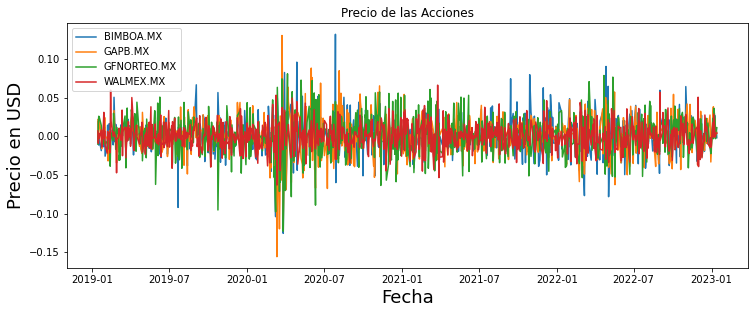

In [141]:
plt.figure(figsize=(12.2,4.5)) 
for i in df_activos.columns.values:
    plt.plot( df_activos[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df_activos.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

In [142]:
df = np.log(df_activos).diff()
df = df_activos.dropna()
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,BIMBOA.MX,GAPB.MX,GFNORTEO.MX,WALMEX.MX
Date,,,,
2019-01-15,0.018790,0.021505,-0.010239,0.006856
2019-01-16,0.005414,-0.007460,0.015850,-0.009085
2019-01-17,-0.011379,0.002968,0.025807,0.003846
2019-01-18,-0.003909,0.024711,0.025250,-0.002630
2019-01-23,-0.018560,-0.000816,0.013901,0.008203
...,...,...,...,...
2023-01-09,0.026540,0.022459,0.021588,-0.001105
2023-01-10,-0.002102,0.006625,-0.003121,0.000829
2023-01-11,0.001660,0.001970,0.006038,0.003996


In [3]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(df.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'df' is not defined

<Figure size 878.4x324 with 0 Axes>

In [145]:
import seaborn as sns
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

NameError: name 'EfficientFrontier' is not defined